**Objective:** The goal of this assignment is to implement a Convolutional Neural Network (CNN)
to classify images from the FashionMNIST dataset. You will learn how to preprocess the data,
build and train a CNN, and evaluate its performance.

**Dataset:** FashionMNIST is a dataset of 60,000 training images and 10,000 test images, each of
size 28x28 grayscale, categorized into 10 different fashion classes (e.g., T-shirt, dress, sneaker,
etc.).

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import RandomContrast, RandomRotation, RandomZoom

from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Part 1: Data Preprocessing
1. Load the FashionMNIST dataset using torchvision.datasets (for PyTorch) or
tensorflow.keras.datasets (for TensorFlow).
2. Normalize the images to the range [0,1] and reshape them if necessary.
3. Split the dataset into training and validation sets

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Add channel and normalize pixel values to be between 0 and 1
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

# Split into 80% training and 20% validation
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, 
    test_size=0.2,  
    random_state=42 
)

# Part 2: Building the CNN Model
1. You can try different CNN architectures (depth, kernel size) yourself
2. Pick appropriate loss function and optimizer

In [3]:
# CNN model 
# Depth: 6 layers
# Convolutional layer kernel size: 3x3, Pooling layer kernel size: 2x2
model = models.Sequential()
model.add(layers.Input(shape=(28,28,1)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense layers to perform classification 
# FashionMNIST has 10 classes, so final dense layer has 10 outputs
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# optimizer: Adam
# loss function: SparseCategoricalCrossentropy = good for multi-class classification tasks
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Part 3: Training & Evaluation
1. Train the model
 - Plot loss curves.
2. Evaluate the model:
 - Compute test accuracy.
 - Generate a confusion matrix

In [4]:
# train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7247 - loss: 0.7476 - val_accuracy: 0.8528 - val_loss: 0.3932
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8691 - loss: 0.3608 - val_accuracy: 0.8808 - val_loss: 0.3162
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8920 - loss: 0.2991 - val_accuracy: 0.8808 - val_loss: 0.3135
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9039 - loss: 0.2629 - val_accuracy: 0.8953 - val_loss: 0.2791
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9152 - loss: 0.2323 - val_accuracy: 0.8953 - val_loss: 0.2932
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9216 - loss: 0.2088 - val_accuracy: 0.9031 - val_loss: 0.2653
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9286 - loss: 0.1913 - val_accuracy: 0.9007 - val_loss: 0.2697
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9373 - loss: 0.1721 - 

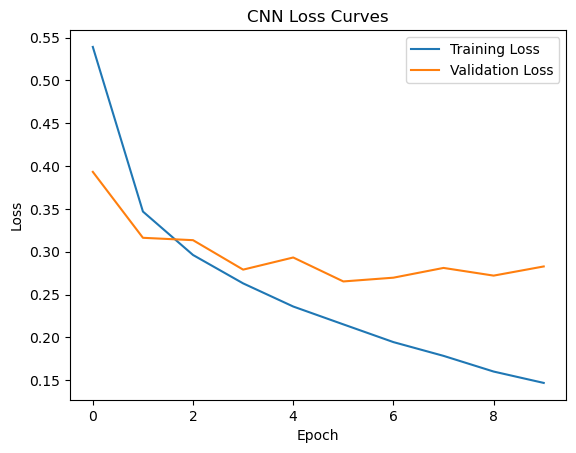

313/313 - 1s - 2ms/step - accuracy: 0.9040 - loss: 0.3053
Test Accuracy: 0.9039999842643738


In [5]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss Curves')

plt.show()

# evaluate on test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


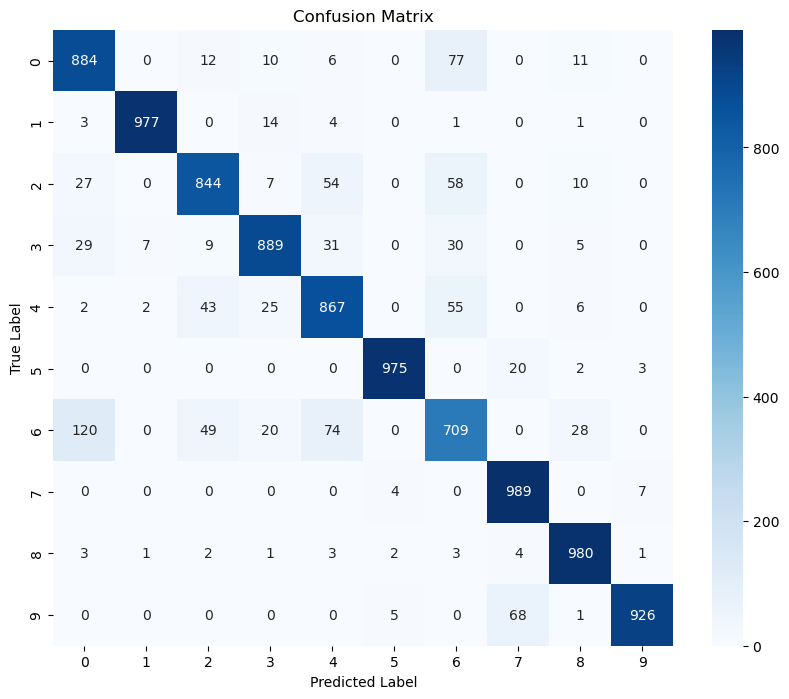

In [6]:
# Confusion Matrix
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1) # classify model predictions

cm = confusion_matrix(test_labels, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Part 4: Experimentation & Improvements
1. Try at least two modifications (e.g., adding more layers, changing filter size, adding
dropout, batch normalization, or data augmentation).
2. Compare results with the baseline model.

In [7]:
# Modified CNN model 
# Adding dropout and batch normalization
modified_model = models.Sequential()
modified_model.add(layers.Input(shape=(28,28,1)))

modified_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
modified_model.add(layers.Dropout(0.2))
modified_model.add(layers.BatchNormalization())
modified_model.add(layers.MaxPooling2D((2, 2)))

modified_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
modified_model.add(layers.Dropout(0.3))
modified_model.add(layers.BatchNormalization())
modified_model.add(layers.MaxPooling2D((2, 2)))

modified_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
modified_model.add(layers.Dropout(0.4))
modified_model.add(layers.BatchNormalization())

modified_model.add(layers.Flatten())
modified_model.add(layers.Dense(64, activation='relu'))
modified_model.add(layers.Dropout(0.5))
modified_model.add(layers.Dense(10))

# optimizer: Adam
# loss function: SparseCategoricalCrossentropy = good for multi-class classification tasks
modified_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
# train modified model
modified_history = modified_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6678 - loss: 0.9660 - val_accuracy: 0.8281 - val_loss: 0.4353
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8205 - loss: 0.4948 - val_accuracy: 0.8599 - val_loss: 0.3744
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8521 - loss: 0.4132 - val_accuracy: 0.8786 - val_loss: 0.3330
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8590 - loss: 0.3925 - val_accuracy: 0.8783 - val_loss: 0.3297
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8713 - loss: 0.3573 - val_accuracy: 0.8797 - val_loss: 0.3043
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8735 - loss: 0.3533 - val_accuracy: 0.8835 - val_loss: 0.3026
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8801 - loss: 0.3317 - val_accuracy: 0.8797 - val_loss: 0.3169
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8843 - l

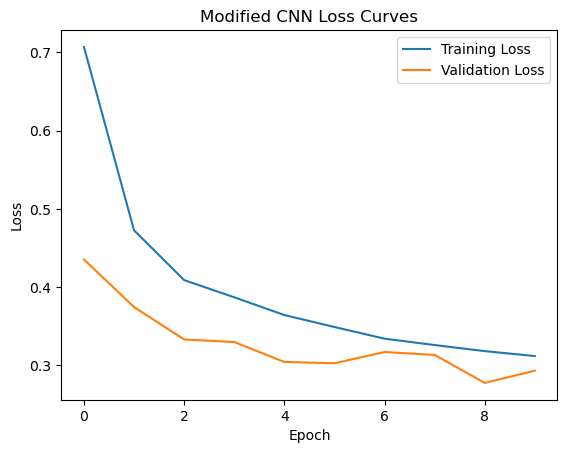

313/313 - 1s - 2ms/step - accuracy: 0.8891 - loss: 0.3033
Test Accuracy: 0.8891000151634216
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


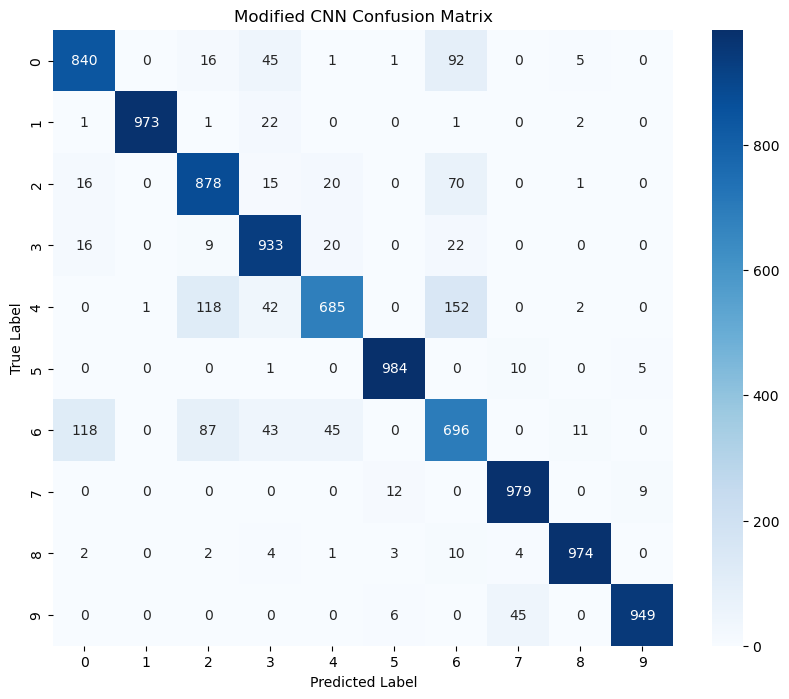

In [9]:
plt.plot(modified_history.history['loss'], label='Training Loss')
plt.plot(modified_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Modified CNN Loss Curves')

plt.show()

# evaluate on test set
test_loss, modified_test_acc = modified_model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {modified_test_acc}")


# Confusion Matrix
modified_y_pred = modified_model.predict(test_images)
modified_y_pred_classes = np.argmax(modified_y_pred, axis=1) # classify model predictions

mod_cm = confusion_matrix(test_labels, modified_y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(mod_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Modified CNN Confusion Matrix')
plt.show()

In [10]:
# Modified CNN model 2
modified_model_2 = models.Sequential()
modified_model_2.add(layers.Input(shape=(28,28,1)))

# data augmentation
modified_model_2.add(RandomRotation(0.1))
modified_model_2.add(RandomZoom(0.1)) 
modified_model_2.add(RandomContrast(0.1))

modified_model_2.add(layers.Conv2D(32, (3, 3), activation='relu'))
modified_model_2.add(layers.MaxPooling2D((2, 2)))
modified_model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
modified_model_2.add(layers.MaxPooling2D((2, 2)))
modified_model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))

modified_model_2.add(layers.Flatten())
modified_model_2.add(layers.Dense(64, activation='relu'))
modified_model_2.add(layers.Dense(10))

# optimizer: Adam
# loss function: SparseCategoricalCrossentropy = good for multi-class classification tasks
modified_model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
# train second modified model
modified_history_2 = modified_model_2.fit(train_images, train_labels, epochs=10, 
                    validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6321 - loss: 0.9863 - val_accuracy: 0.7987 - val_loss: 0.5422
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7907 - loss: 0.5590 - val_accuracy: 0.8262 - val_loss: 0.4833
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8182 - loss: 0.4857 - val_accuracy: 0.8501 - val_loss: 0.4185
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8366 - loss: 0.4359 - val_accuracy: 0.8301 - val_loss: 0.4736
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8534 - loss: 0.3991 - val_accuracy: 0.8581 - val_loss: 0.3954
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8596 - loss: 0.3763 - val_accuracy: 0.8669 - val_loss: 0.3783
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8662 - loss: 0.3612 - val_accuracy: 0.8593 - val_loss: 0.3794
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8735 - loss: 0.3417 - 

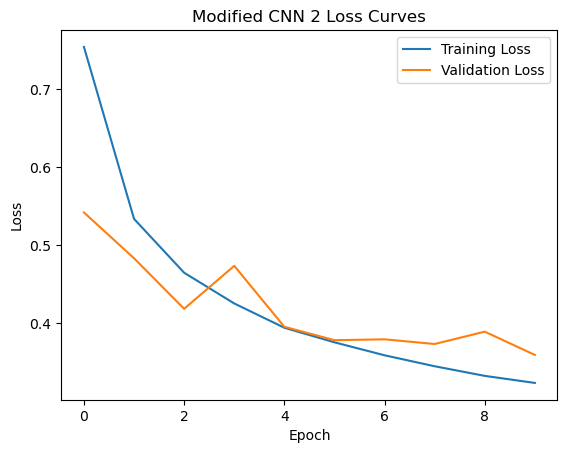

313/313 - 0s - 2ms/step - accuracy: 0.8713 - loss: 0.3741
Test Accuracy: 0.8712999820709229
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


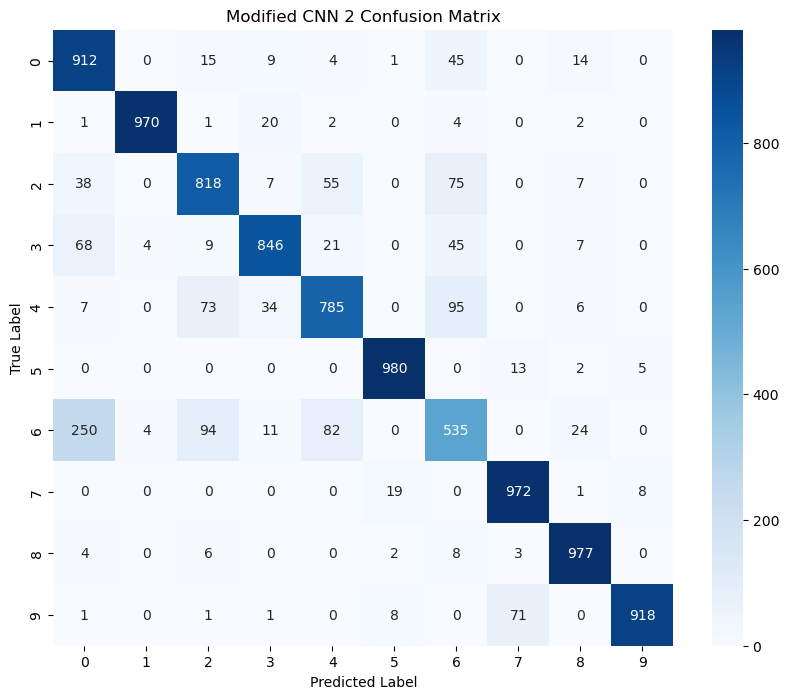

In [12]:
plt.plot(modified_history_2.history['loss'], label='Training Loss')
plt.plot(modified_history_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Modified CNN 2 Loss Curves')

plt.show()

# evaluate on test set
test_loss, modified_test_acc_2 = modified_model_2.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {modified_test_acc_2}")


# Confusion Matrix
modified_y_pred_2 = modified_model_2.predict(test_images)
modified_y_pred_classes_2 = np.argmax(modified_y_pred_2, axis=1) # classify model predictions

mod_cm_2 = confusion_matrix(test_labels, modified_y_pred_classes_2)
plt.figure(figsize=(10, 8))
sns.heatmap(mod_cm_2, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Modified CNN 2 Confusion Matrix')
plt.show()

In [13]:
# Compare all three test accuracies
results = pd.DataFrame({
    "Model": ["Original CNN", "CNN with dropout & batch normalization", "CNN with data augmentation"],
    "Test Accuracy": [test_acc, modified_test_acc, modified_test_acc_2]
})

print(results)

                                    Model  Test Accuracy
0                            Original CNN         0.9040
1  CNN with dropout & batch normalization         0.8891
2              CNN with data augmentation         0.8713
